Heart Disease Predicition - DSEN B - Gnichi Med Amine 23/24

1/ Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['app.py', 'flask', 'hd.pkl', 'heart.csv', 'Heart_disease.ipynb', 'static', 'templates', '__pycache__']


2/ Undrestanding the dataset

In [2]:
dataset = pd.read_csv("heart.csv")

In [3]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
type(dataset)

pandas.core.frame.DataFrame

Number of columns and lines

In [5]:
dataset.shape

(303, 14)

Top 10 lines

In [6]:
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Taking A random lines to make comparasion

In [7]:
dataset.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2,1
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0
208,49,1,2,120,188,0,1,139,0,2.0,1,3,3,0
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1,0
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
115,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3,0
263,63,0,0,108,269,0,1,169,1,1.8,1,2,2,0


In [8]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
## This dataset is clean , so we don't have any missing values

Undrestanding the columns much better:

In [11]:
info = [
        "age",
        "1: male, 0: female",
        "chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic",
        "resting blood pressure",
        " serum cholestoral in mg/dl",
        "fasting blood sugar > 120 mg/dl",
        "resting electrocardiographic results (values 0,1,2)",
        " maximum heart rate achieved",
        "exercise induced angina",
        "oldpeak = ST depression induced by exercise relative to rest",
        "the slope of the peak exercise ST segment",
        "number of major vessels (0-3) colored by flourosopy",
        "thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"
        ]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


Analyse TARGET Variable

In [12]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [13]:
dataset["target"].unique()

array([1, 0], dtype=int64)

In summary, based on the characteristics of the "target" variable, it can be concluded that the problem is a binary classification task.

Checking Correlation between columns :

In [14]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


Most columns are moderately correlated with "target" , but 'fbs' and 'chol' are too weakly correlated.

Exploratory Data Analysis (EDA)
First, analysing the target variable:

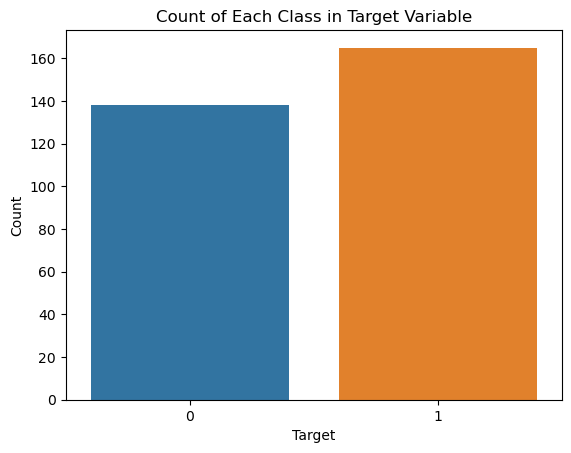

1    165
0    138
Name: target, dtype: int64


In [15]:
colors=["#1f77b4", "#ff7f0e","#a70000","#607c3c","#4eff00","#9b9b9b","#ff00ba","#000000"]  # Blue for class 0, Orange for class 1
sns.countplot(data=dataset, x="target", palette=colors)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Count of Each Class in Target Variable')
plt.show()

target_temp = dataset.target.value_counts()

print(target_temp)

In [16]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))


Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


Analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

Analysing 'Sex' feature

In [17]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

We notice, that as expected, the 'sex' feature has 2 unique features

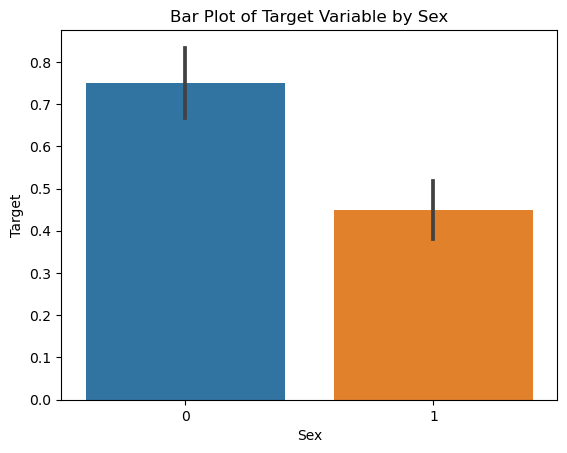

In [18]:
sns.barplot(x="sex", y="target", data=dataset , palette=colors)
plt.xlabel('Sex')
plt.ylabel('Target')
plt.title('Bar Plot of Target Variable by Sex')
plt.show()

Female are likely to have heart disease than Male

Analysing the 'Chest Pain Type' feature

In [19]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

3 Types of values , 0 to 3

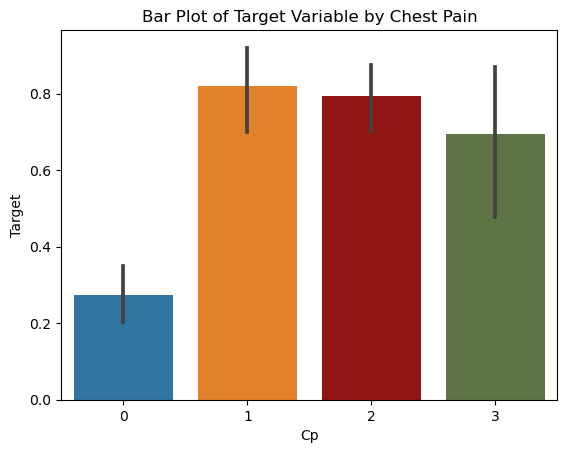

In [20]:

sns.barplot(x="cp", y="target", data=dataset,palette=colors)
plt.xlabel('Cp')
plt.ylabel('Target')
plt.title('Bar Plot of Target Variable by Chest Pain')
plt.show()

We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

Analysing the FBS feature

In [21]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [22]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

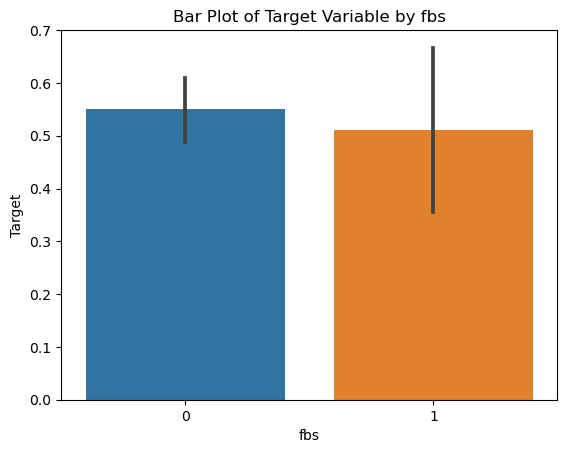

In [23]:
sns.barplot(x="fbs", y="target", data=dataset,palette=colors)
plt.xlabel('fbs')
plt.ylabel('Target')
plt.title('Bar Plot of Target Variable by fbs')
plt.show()

Everything is okay

Analysing the restecg feature

In [24]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

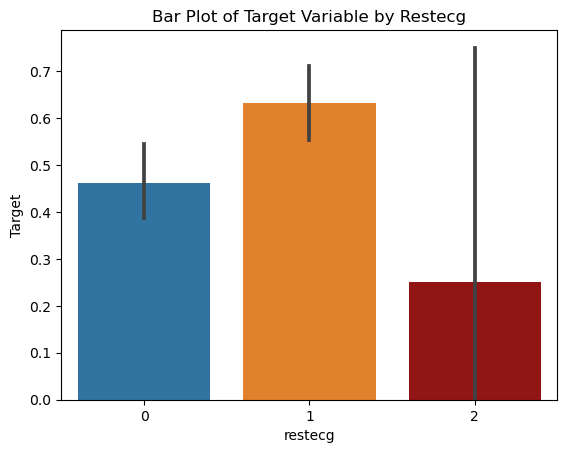

In [25]:
sns.barplot(x="restecg", y="target", data=dataset,palette=colors)
plt.xlabel('restecg')
plt.ylabel('Target')
plt.title('Bar Plot of Target Variable by Restecg')
plt.show()

We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

Analysing the 'exang' feature

In [26]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

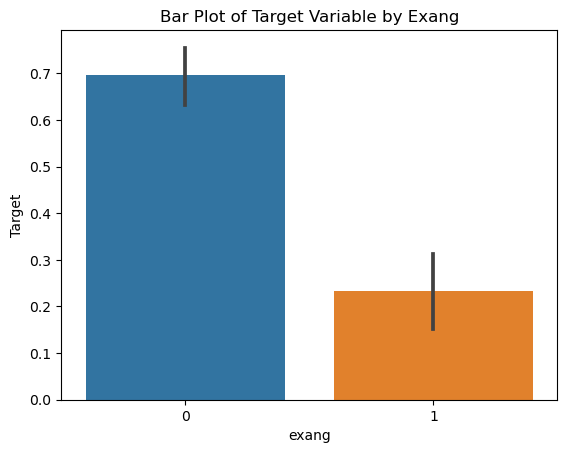

In [27]:
sns.barplot(x="exang", y="target", data=dataset,palette=colors)
plt.xlabel('exang')
plt.ylabel('Target')
plt.title('Bar Plot of Target Variable by Exang')
plt.show()

People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

Analysing the Slope feature

In [28]:
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

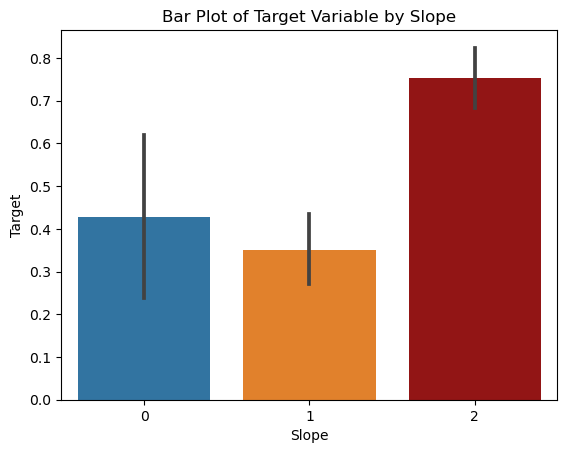

In [29]:
sns.barplot(x="slope", y="target", data=dataset,palette=colors)
plt.xlabel('Slope')
plt.ylabel('Target')
plt.title('Bar Plot of Target Variable by Slope')
plt.show()

We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

Analysing the 'ca' feature

In [30]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

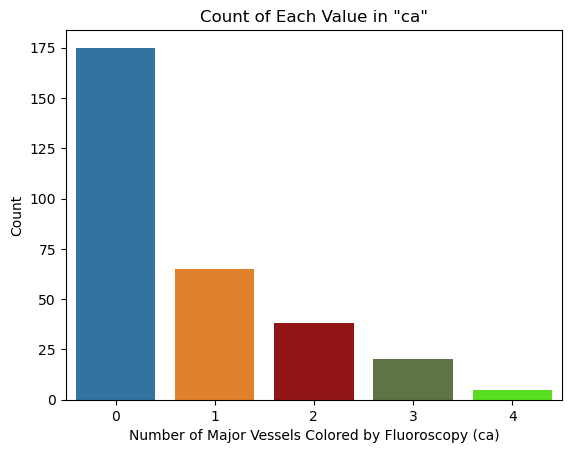

In [31]:
sns.countplot(x="ca", data=dataset,palette=colors)
plt.xlabel('Number of Major Vessels Colored by Fluoroscopy (ca)')
plt.ylabel('Count')
plt.title('Count of Each Value in "ca"')
plt.show()

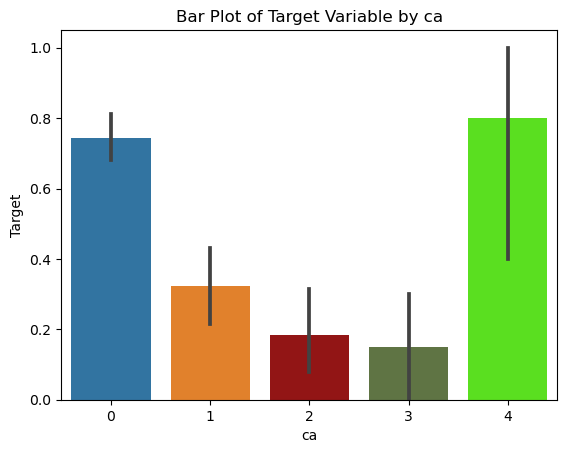

In [32]:
sns.barplot(x="ca", y="target", data=dataset,palette=colors)
plt.xlabel('ca')
plt.ylabel('Target')
plt.title('Bar Plot of Target Variable by ca')
plt.show()

ca=4 has astonishingly large number of heart patients

Analysing the 'thal' feature

In [33]:
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

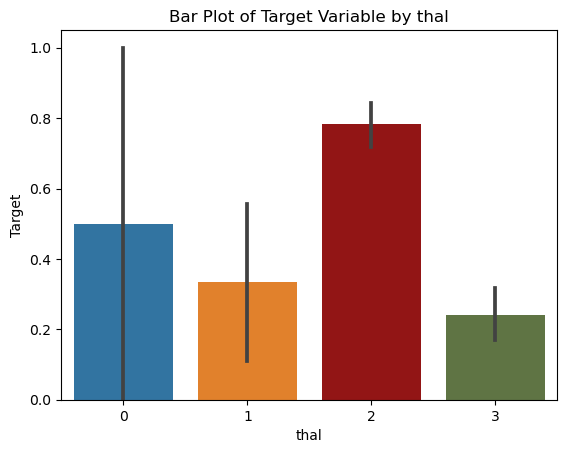

In [34]:
sns.barplot(x="thal", y="target", data=dataset,palette=colors)
plt.xlabel('thal')
plt.ylabel('Target')
plt.title('Bar Plot of Target Variable by thal')
plt.show()

<Axes: xlabel='thal', ylabel='Density'>

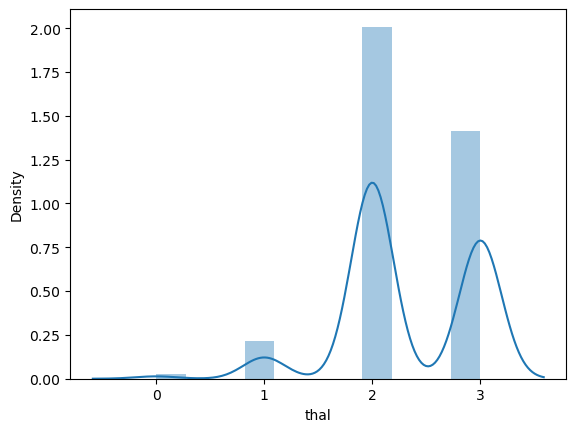

In [35]:
sns.distplot(dataset["thal"])

IV. Train Test split

In [36]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [37]:

X_train.shape

(242, 13)

In [38]:
X_test.shape

(61, 13)

In [39]:
Y_train.shape

(242,)

In [40]:
Y_test.shape

(61,)

V. Model Fitting

In [41]:
from sklearn.metrics import accuracy_score

Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [43]:
Y_pred_lr.shape

(61,)

In [44]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


Naive Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [46]:
Y_pred_nb.shape

(61,)

In [47]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


SVM

In [48]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [49]:
Y_pred_svm.shape

(61,)

In [50]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


K Nearest Neighbors

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [52]:
Y_pred_knn.shape

(61,)

In [53]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [55]:
print(Y_pred_dt.shape)

(61,)


In [56]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


Random Forest

In [60]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)
model =RandomForestClassifier()
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [61]:
Y_pred_rf.shape

(61,)

In [62]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.16 %


XGBoost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

ModuleNotFoundError: No module named 'xgboost'

In [ ]:

Y_pred_xgb.shape

In [ ]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

Neural Network

In [ ]:
import tensorflow as tf
import distutils as _distutils

from tensorflow import keras
from keras import Model
from keras import Dense


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=300)

In [ ]:
Y_pred_nn = model.predict(X_test)


In [ ]:
Y_pred_nn.shape

In [ ]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [ ]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 

NameError: name 'Y_pred_nn' is not defined

VI. Output final score


In [ ]:

scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

In [ ]:
scores = [score_lr, score_nb, score_svm, score_knn, score_dt, score_rf, score_xgb, score_nn]
algorithms = [
    "Logistic Regression", "Naive Bayes", "Support Vector Machine",
    "K-Nearest Neighbors", "Decision Tree", "Random Forest", "XGBoost", "Neural Network"
]

# Print accuracy scores for each algorithm
for algorithm, score in zip(algorithms, scores):
    print(f"The accuracy score achieved using {algorithm} is: {score:.2f}%")

# Plotting
sns.set(rc={'figure.figsize': (15, 8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(x=algorithms, y=scores, palette=colors)
plt.show()

NameError: name 'score_lr' is not defined

Conclusion , The best accuaracy is for Random forest

In [ ]:
import pickle

In [ ]:
import joblib
joblib.dump(model, 'hd.pkl')

In [63]:
import pickle
with open('random_forest.pkl','wb') as f:
    pickle.dump(RandomForestClassifier,f)

In [64]:
with open('random_forest.pkl','rb') as f:
          loaded_random_forest_model = pickle.load(f)